# Search Engine - Atlas Obscura

- Gasbarri Francesca
- Migliarini Matteo 1886186 
- Antonio 

In [ ]:
%pip install beautifulsoup4
%pip install locationtagger

Importing Libraries

In [19]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

%load_ext autoreload
%autoreload 2
%matplotlib inline
sns.set(rc={"figure.figsize":(8, 5)})
sns.set_theme(style='darkgrid', palette='pastel')

## 1. Data collection

In [3]:
from func.scraper import crawl_urls, setup_folders, download_pages, parse_page, extract_data

Get the list of the places

In order to accomplish this task we first need to get all the URLs of the first 7200 palces we are interested in.

In [4]:
if not os.path.exists('urls.txt'):
    crawl_urls(websites=[f'https://www.atlasobscura.com/places?page={i}&sort=likes_count' for i in range(1,401)])

### Crawl places

Now we dowload all of them

In [5]:
setup_folders(7201//18)
download_pages(
    src=open('urls.txt', 'r').readlines(), 
    base_dir='data',
    naming=lambda i: f'page{(i-1)//18+1}/place_{(i-1)%18}',
    verbose=True)

[================================================= ] 99% : 7200
file already exists: 7200 	 data/page400/place_17.html                                                  


7201

### Parse downloaded pages

In the parsing of the HTML document I take some choices:
- in the `placeEditors` field I *do* count also the original Author.
- the subscript under the title (indicate an approximate location) is not taken into account anywhere in the instructions, nonetheless we decided to take it into account in the `placeZone` field.
- the `placeAddress` is the most problematic field to retrieve, but at the end I managed to get every data I was interested in. 
- there is at least one problematic row with erroneous or incomplete values, such as coordinates `(0,0)`. I decided to keep it this way since these are nonetheless the values that appear on the website
- Whenever one of the fields of collection type (such as `placeEditors`, `placeLists` or `placeTags`) are empty, I replace them with a `NaN` value.

Here's an example of the parsing of one document:

In [6]:
parse_page(open('data/page46/place_6.html', 'r'), 'url')

{'placeName': 'Cherry Springs State Park',
 'placeTags': 'NA',
 'numPeopleVisited': 271,
 'numPeopleWant': 1511,
 'placeDesc': 'Inside the Susquehannock State Forest is a dark spot.\xa0 An area with no artificial light pollution, it is a haven for east coast astronomers.\nCleaved off from the Susquehannock in 1922, the 48-acre park grew back from its near-obliteration due to clear-cutting.\xa0 In 2000, it was named a Dark Sky Park by the Pennsylvania Department of Conservation and Natural Resources, and in 2007 was the second place added to the International Dark Sky Association’s register of “International Dark Sky Parks.”\xa0 Since acquiring the nearby Cherry Springs Airport in 2006, the area is so dark at night that, under ideal conditions, the Milky Way casts a visible shadow.',
 'placeShortDesc': 'Dark Sky Park is heaven on Earth for astronomers, one of the rare U.S. locations with no artificial light pollution.',
 'placeNearby': ['Coudersport Ice Mine', 'Austin Dam', 'Pine Creek 

In [7]:
if not os.path.exists('places.tsv'):
    extract_data()

The resuling dataframe is the following:

In [8]:
data = pd.read_csv('places.tsv', sep='\t', parse_dates=['placePubDate'])
data.head()

,placeName,placeTags,numPeopleVisited,numPeopleWant,placeDesc,placeShortDesc,placeNearby,placeAddress,placeAlt,placeLng,placeEditors,placePubDate,placeRelatedLists,placeRelatedPlaces,placeUrl,placeZone
0,City Hall Station,"{'architectural oddities', 'subterranean', 'su...",1828,8580,The first New York City subway was built and o...,A beautiful and abandoned New York subway stat...,"['African Burial Ground National Monument', 'T...","31 Centre St; New York, New York, 10007; Unite...",40.7134,-74.0046,"{'mbison', 'Rebekah Otto', 'Mike H', 'Habicuri...",2010-05-08,['30 Unexpected Places to Have a Joyful Advent...,"['Crystal Palace Subway', 'Moscow Metro Statio...",https://www.atlasobscura.com/places/city-hall-...,"Manhattan, New York"
1,Highgate Cemetery,"{'catacombs and crypts', 'rivals week', 'vampi...",2617,8182,"Opened in 1839, Highgate is one of London’s mo...",London's creepiest cemetery was once the site ...,"[""World's Largest Potted Plant"", 'Dick Whittin...","Swain's Lane, Highgate; London, England, N6; U...",51.5675,-0.1483,"{'mbison', 'gingercinnamon', 'Goksu', 'Lauren ...",2014-08-09,"[""The World's Top 100 Wonders in 2018"", ""Londo...","['Jewett City Vampires', 'Tomb of the Mather F...",https://www.atlasobscura.com/places/highgate-c...,"London, England"
2,Leadenhall Market,"{'film locations', 'markets', 'film'}",3134,7567,The ornate 19th-century painted roof and cobbl...,This ornate Victorian marketplace was the sett...,"['The Cornhill Devils', ""London's Original and...","London, England, EC3V; United Kingdom",51.5126,-0.0834,"{'JZA', 'Goksu', 'JulesR', 'lili', 'amiedd', '...",2016-08-01,"['The Ultimate Guide to Stunning, Surprising, ...","['Rivendell', 'Bagdad Cafe', 'Gare de la Ciota...",https://www.atlasobscura.com/places/leadenhall...,"London, England"
3,The Wave Organ,"{'art', 'aletrail', 'music', 'sounds', 'sea or...",2427,7406,"Located on a jetty in the San Francisco Bay, t...",A huge musical instrument played by the ocean.,"['Long Now Orrery', 'The Stern of the Briganti...","83 Marina Green Dr; San Francisco, California,...",37.8085,-122.4401,"{'mbison', 'catleast', 'bylow1md', 'td007', 'e...",2008-11-21,"[""Leonardo Nam's 16 Quirky Roadside Attraction...","['Sea Organ', 'Silent Green Kulturquartier', ""...",https://www.atlasobscura.com/places/wave-organ,"San Francisco, California"
4,Catacombes de Paris,"{'ossuaries', 'catacombs and crypts', 'memento...",4445,7045,"In 2004, Parisian police were assigned to do a...","The vast, legendary catacombs hold secrets muc...","['Sculptures de Décure', 'Arago Medallions', ""...","1 Place Denfert-Rochereau; Paris, 75014; France",48.8343,2.3322,"{'gingercinnamon', 'Kidiu', 'valely199', 'Laur...",2009-02-13,"['19 Catacombs Sure to Tingle Your Spine', ""Th...","['Ossario di San Martino', 'Leuk Charnel House...",https://www.atlasobscura.com/places/catacombes...,"Paris, France"


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   placeName           7200 non-null   object        
 1   placeTags           7166 non-null   object        
 2   numPeopleVisited    7200 non-null   int64         
 3   numPeopleWant       7200 non-null   int64         
 4   placeDesc           7200 non-null   object        
 5   placeShortDesc      7200 non-null   object        
 6   placeNearby         7200 non-null   object        
 7   placeAddress        7200 non-null   object        
 8   placeAlt            7200 non-null   float64       
 9   placeLng            7200 non-null   float64       
 10  placeEditors        7200 non-null   object        
 11  placePubDate        7199 non-null   datetime64[ns]
 12  placeRelatedLists   2760 non-null   object        
 13  placeRelatedPlaces  7166 non-null   object      

## 2. Search Engine

The [NLTK](https://www.nltk.org/) Library allows us to process each description and to reduce it to its 'kernel':
- Removing stopwords
- Removing punctuation
- Stemming each word

In [10]:
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import nltk
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords

wd_tokens = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

pre_process = lambda d: {ps.stem(word.lower()) for word in wd_tokens.tokenize(d) if word not in stop_words}
print(pre_process('Opened in 1921, New York City first central station is one of the most prominent of its kind!'))

{'citi', 'station', 'kind', 'new', 'york', 'central', '1921', 'open', 'first', 'one', 'promin'}


### Conjunctive query

We now want to build our reversed index, such that for each stemmed term of our descriptions we know the list of the associated documents. The first naive approach to build such an index would be using a `dict` with key the term and value a `list` (or `set`) of documents ids. 
While this implementation would work quite fine at the beginning, we soon realize that we would be limited in the next steps, as such we focus on a more complex and efficient approach that will likely help us later.

We decide to implement this task by storing our reverse index in a [Sparse Matrix](https://docs.scipy.org/doc//scipy/reference/sparse.html), a model for mostly empty matrices, as this is our case. Each column of the $M$ matrix is one of the 7200 documents and each row is an integer $i \in  \{0,2^{64}-1\}$, representing the 64 bit hashing of the terms of the documents, $i = hash(term) $.
As such the resulting content of a cell is 
$$
\forall i, i = hash(term) : \ 
M_{ij} = 
\begin{cases}
    1 & \text{if  } term \in document_j \\
    0 & \text{otherwise}
\end{cases} 
$$
Then, given a vectorized query $q$ of length $m$ (assuming no repetitions in the query terms), the output we search are the indexes of the matrix multiplication $sum\_over\_columns(q \cdot M)$ where the value is equal to $m$.

In [11]:
from func.engines import Engine

simpleEngine = Engine(data, out_columns=['placeName', 'placeDesc', 'placeUrl'])
simpleEngine.fit(['placeDesc'])
simpleEngine.search('Yellow grin')

,placeName,placeDesc,placeUrl
1838,The Smile Face Museum,A shrine to the iconic yellow grin that has ac...,https://www.atlasobscura.com/places/the-smile-...


We can now test out our new *Simple Search Engine* :

In [12]:
simpleEngine.search(query=input("Search Atlas Obscura: "), k=5)

Search Atlas Obscura:  American Museum


,placeName,placeDesc,placeUrl
59,The Witch House of Salem,The Salem witchcraft trials took place between...,https://www.atlasobscura.com/places/witch-hous...
141,Museum of the Weird,The dime or dime store museum is by all accoun...,https://www.atlasobscura.com/places/museum-weird
173,National Atomic Testing Museum,Las Vegas is an oasis in the desert where no o...,https://www.atlasobscura.com/places/national-a...
224,Canyons of the Ancients,Ripe for quiet reflection and simply awe-inspi...,https://www.atlasobscura.com/places/canyons-of...
320,The Natural Bridge,Often cited as having a place among the great ...,https://www.atlasobscura.com/places/the-natura...


One of the reasons for which we use a Sparse matrix is because in this way we can spare so much memory, in fact this is the percentage of usage of our matrix over all!

In [13]:
print(f'Index Matrix sparsity factor: { simpleEngine.matrix.nnz / simpleEngine.matrix.shape[0] /simpleEngine.matrix.shape[1]}%')

Index Matrix sparsity factor: 1.4168097997860956e-17%


### Conjunctive query & Ranking score

The **Cosine Similarity** allows us to compare 2 documents and identify the grade of Similarity between them. 
$$
    cos\_sim(a, b) = \frac{a \cdot b}{||a|| \ ||b||} = \sum_{i=0}^n \frac{ a_i b_i}{||a|| \ ||b||}
$$
Now, given a document and its vectorized form $d$, we want to define a score for each of its terms that weights the importance of that term. We define this as the **Term Frequency - Inverted Document Frequency** score, composed by:
$$
    TF\_IDF(t,d) = TF(t,d) \cdot IDF(d,t)
$$
Where the **term frequency** is the frequency (importance) of the term in that document:
$$
    TF(t,d) = \frac{d_t}{||d||}
$$
And the **inverted document frequency** is the inverse frequency of the term in the corpus $D$ of the documents:
$$
    IDF(t) = \frac{|D|}{|\{d \in D : d_t \in d\}|}
$$
As such we can see that for any query $q$ of length $N$ (assuming no repetitions in the query terms), the cosine similarity with the document $d$ is :

$$
    similarity(q, d) = cosine\_similarty \left( 
        \left[\begin{array}{cccc}
            TF\_IDF(q_1, d)\\
            TF\_IDF(q_2, d)\\
            \vdots \\
            TF\_IDF(q_m, d)
        \end{array} \right] , 
        \left[\begin{array}{cccc}
            TF\_IDF(q_1, q)\\
            TF\_IDF(q_2, q)\\
            \vdots \\
            TF\_IDF(q_m, q)
        \end{array} \right] \right)

$$

In [14]:
from func.engines import SimilarityEngine

simEngine = SimilarityEngine(data, ['placeName', 'placeDesc', 'placeUrl'])
simEngine.fit(['placeDesc'])
simEngine.search('london highgate cemetery', k=3)

,placeName,placeDesc,placeUrl,similarity
1,Highgate Cemetery,"Opened in 1839, Highgate is one of London’s mo...",https://www.atlasobscura.com/places/highgate-c...,0.916812
2964,World's Largest Potted Plant,At the heart of the west side of Highgate Ceme...,https://www.atlasobscura.com/places/worlds-lar...,0.914416
6590,Dick Whittington’s Cat,"Born in the 135os, Richard Whittington was a p...",https://www.atlasobscura.com/places/dick-whitt...,0.808255


#### Let's test the search engine: 

In [15]:
simEngine.search(query=input("Search Atlas Obscura: "), k = 5)

Search Atlas Obscura:  American Museum


,placeName,placeDesc,placeUrl,similarity
3710,Birthplace of the Banana Split,David Strickler was just a 23-year-old pharmac...,https://www.atlasobscura.com/places/birthplace...,1.0
2938,Aria Antiques,Tucked between the Italian bakeries and laundr...,https://www.atlasobscura.com/places/aria-antiques,1.0
1890,Old Slave Mart,"Built in 1859, the Old Slave Mart was actually...",https://www.atlasobscura.com/places/old-slave-...,1.0
6946,Zwack Unicum Museum,Sometimes referred to as the Hungarian nationa...,https://www.atlasobscura.com/places/zwack-unic...,1.0
6258,French Azilum,Despite France’s crucial role in helping Ameri...,https://www.atlasobscura.com/places/french-azilum,1.0


Kinda specific query:

In [16]:
simEngine.search(query='yellow grin iconic good shrine that has acted as a symbol', k=5)

,placeName,placeDesc,placeUrl,similarity
1838,The Smile Face Museum,A shrine to the iconic yellow grin that has ac...,https://www.atlasobscura.com/places/the-smile-...,0.956718
5890,Batu Caves,"During Thaipusam, an annual celebration of the...",https://www.atlasobscura.com/places/batu-caves,0.682063
4026,Skull Rack of the Great Temple,At the ruins of the Great Temple (Templo Mayor...,https://www.atlasobscura.com/places/skull-rack...,0.668034
420,Fantasy Dining Alice in a Labyrinth,This place is much more than a restaurant. It’...,https://www.atlasobscura.com/places/alice-wond...,0.663290
2315,Temple of Valadier,Sitting just inside the tall mouth of an Itali...,https://www.atlasobscura.com/places/temple-of-...,0.648339


A very specific query:

In [17]:
simEngine.search(query='When visitors first step into Abby Rose Vintage shop, it appears to be just another store to peruse classic objects such as fine china, soaps, and beautiful vintage art.\nHowever, a few steps into a dimly lit back room and visitors are met by grinning skeletons, macabre antiques, and esoteric books. This is Prometheus Esoterica, Winter Park’s own little oddity shop and gothic boutique. Whether you are shopping for taxidermy needs or looking to add some herbs to your apothecary, Prometheus Esoterica is a must-stop for anyone passing through the Orlando area.', k=5)

,placeName,placeDesc,placeUrl,similarity
2410,Prometheus Esoterica,When visitors first step into Abby Rose Vintag...,https://www.atlasobscura.com/places/prometheus...,0.998667
4286,Chancellor Robert R Livingston Masonic Library,With one of the largest known collections of r...,https://www.atlasobscura.com/places/chancellor...,0.429566
777,The Bristlecone Pines of the Great Basin,At high elevations in a region of the western ...,https://www.atlasobscura.com/places/the-bristl...,0.412539
2674,Crane Mansion on Castle Hill,The 1987 film “Flowers in the Attic” is based ...,https://www.atlasobscura.com/places/crane-mans...,0.397971
6743,Prometheus Tree Stump,Sitting among a small copse of pine trees on N...,https://www.atlasobscura.com/places/prometheus...,0.397940


### Visualize vector documents and queries

In [20]:
SimilarityEngine.cosine_sim(np.array([1.04362486, 0.7829764]), np.array([0.00970814, 0.0072835 ]))

0.999999999999984

The cosine similarity computes the angle bewteen two vectors. A result of 1 means that their angle is 0, and the vectors are as similar as they can be, a result of 0 means that their angle is 90 and the vectors are as diverse as they can be.

![Cosine similarity](images/cosine-similarity.png)

Text(0.5, 1.0, '"castle cemetery" query vs Nearest Documents')

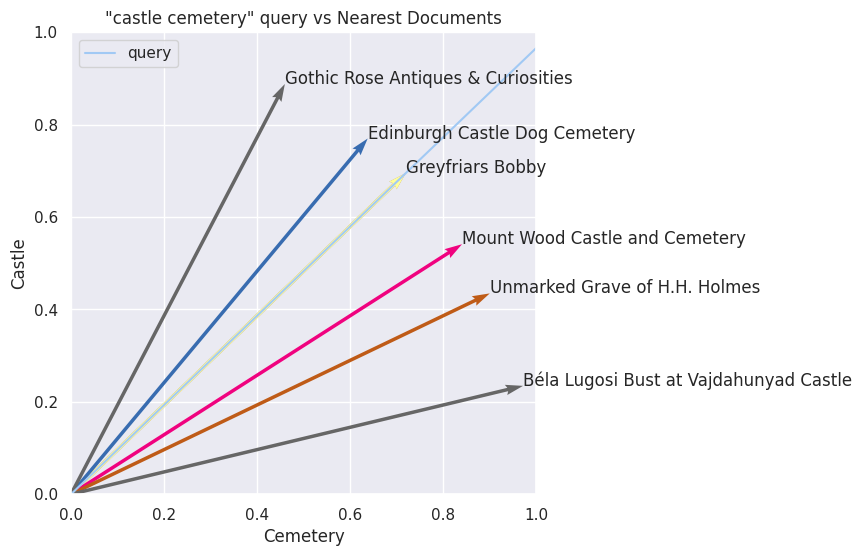

In [21]:
v = simEngine.similar_vectors('castle cemetery', k=9)
p = np.vstack(list(v.values()))
plt.figure(figsize=(6,6))
plt.quiver(np.zeros(p.shape[0]-1), np.zeros(p.shape[0]-1),
    p[:-1,0],
    p[:-1,1],
    angles='xy', scale_units='xy', scale=1, color=[plt.get_cmap('Accent')(i) for i in range(p.shape[0])]
)
plt.plot([0,v['QUERY'][0]*10], [0,v['QUERY'][1]*10], label='query')
plt.legend()
s = set()
for d, vec in v.items():
    if round(vec[0],3) not in s:
        s.add(round(vec[0],3))
        plt.annotate(d, vec)
plt.ylim(0,1)
plt.xlim(0,1)
plt.ylabel('Castle')
plt.xlabel('Cemetery')
plt.title('"castle cemetery" query vs Nearest Documents')

### Evaluation of queries
Now that we have our personal Search Engine we want to evaluate how good it is. In order to do this we use some specifics metrics. Let $R_q$ be the set of the $k$ relevant items for the query $q \in Q$, and let $S_q$ be the $k$ top results of our algorithm:
- **Top-K Accuracy**: is at least one relevant item in the results? $\frac{|\{ S_q :  S_q \cap R_q \neq \emptyset \ , \ \forall q \in Q \}|}{|Q|}$
- **Precision@K**: How many relevant items are in the first $k$ results $\frac{|\{S_q \cap R_q \}|}{k}$
- **Recall@K**: How many relevant items are in our results over all the relevant items for that query? $\frac{|\{S_q \cap R_q \}|}{|R_q|}$
- **K-Relevance**: How far do we have to go before finding the first $k$ relevant items? $\ \ j : \ \  R_q[0:k] \in S_q[0:j]$
- **Mean Average Precision**: $\frac{1}{|R_q|} \sum_{k=1}^{N} \text{Precision@k}(k)$

Sources: [StackExchange](https://stats.stackexchange.com/questions/159657/metrics-for-evaluating-ranking-algorithms), [Medium Article](https://towardsdatascience.com/ranking-evaluation-metrics-for-recommender-systems-263d0a66ef54)

We first have to retrieve some queries to confront out own queries with. For this reason we execute 3000 random queries to the Atlas Obscura website, and then we retrieve their results. We'll consider the items in retrieved by the Atlas Obscura queries as "Relevant" to that query. 

First we randomly generate some queries, and then we proceed in the scraping of the web pages, similarly to what we have done in 1.1 and 1.2:

In [22]:
from func.scraper import generate_queries

if not os.path.exists('queries/queries.txt'): 
    os.makedirs('queries', exist_ok=True)
    queries = generate_queries(data.placeDesc)

    with open('queries/queries.txt', 'w') as out:
        out.write('\n'.join(queries))

    download_pages(
        src=[f'https://www.atlasobscura.com/search?q={query.replace(" ", "%20")}&kind=keyword' for query in queries], 
        base_dir='queries',
        naming=lambda i: f'query_{i}',
        end=len(queries)+1,
        sleep=0.5,
        verbose=True)

In [23]:
if not os.path.exists('queries.csv'):
    query_df = pd.DataFrame(columns=['query', *range(0,15)])
    for i, query in enumerate(queries[3000], start=1):
        if not os.path.exists(f'queries/query_{i}.html'):
            continue
        with open(f'queries/query_{i}.html', 'r') as f:
            html = BeautifulSoup(f, features="lxml")
            res = ['https://www.atlasobscura.com'+card.attrs['href'] for card in html.find_all('a' , class_='content-card-place')]
            query_df.loc[i] = [query ,*res, *['NA']*(15-len(res))]

    query_df.to_csv('queries.csv', index=False)

These are some of the generated queries, each row contains the query and the first 15 results (if they exist):

In [24]:
query_df = pd.read_csv('queries.csv')
query_df.head()

,query,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,architectural vaulted station,https://www.atlasobscura.com/places/city-hall-...,https://www.atlasobscura.com/places/vanderbilt...,https://www.atlasobscura.com/places/templo-de-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,large specially express,https://www.atlasobscura.com/places/city-hall-...,https://www.atlasobscura.com/places/gate-tower...,https://www.atlasobscura.com/places/haymarket-...,https://www.atlasobscura.com/places/michelange...,https://www.atlasobscura.com/places/green-rive...,https://www.atlasobscura.com/places/camp-atter...,https://www.atlasobscura.com/places/prince-dem...,https://www.atlasobscura.com/places/cocodrilo-...,https://www.atlasobscura.com/places/karlag-mem...,NaN,NaN,NaN,NaN,NaN,NaN
2,intended ceilings,https://www.atlasobscura.com/places/city-hall-...,https://www.atlasobscura.com/places/haint-blue...,https://www.atlasobscura.com/places/church-of-...,https://www.atlasobscura.com/places/naniboujou...,https://www.atlasobscura.com/places/belcourt-c...,https://www.atlasobscura.com/places/roman-cist...,https://www.atlasobscura.com/places/la-cruceci...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,manchester however,https://www.atlasobscura.com/places/highgate-c...,https://www.atlasobscura.com/places/cat-alley,https://www.atlasobscura.com/places/soviet-eng...,https://www.atlasobscura.com/places/the-new-ma...,https://www.atlasobscura.com/places/victoria-b...,https://www.atlasobscura.com/places/out-house,https://www.atlasobscura.com/places/bubblegum-...,https://www.atlasobscura.com/places/victoria-a...,https://www.atlasobscura.com/places/holden-woo...,https://www.atlasobscura.com/places/the-union-...,https://www.atlasobscura.com/places/st-michael...,https://www.atlasobscura.com/places/statue-of-...,https://www.atlasobscura.com/places/dovedale-s...,https://www.atlasobscura.com/places/locomotive...,https://www.atlasobscura.com/places/the-snowman
4,regenerated claimed headless,https://www.atlasobscura.com/places/highgate-c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
from func.metrics import score_metrics, evaluate_engine

query, *y = query_df.sample().iloc[0]
print(query)
score_metrics(query, y, simEngine)

fire welcome


{'Top-k Accuracy': True,
 'Precision@k': 0.4,
 'Mean Average Precision': 0.2978728678728679,
 'Recall@k': 0.42857142857142855,
 'K-Relevance': 709}

In [36]:
print("Simple Engine:")
evaluate_engine(query_df, simpleEngine)
print("\nSimilarity Engine: ")
evaluate_engine(query_df, simEngine)

Simple Engine:
Top-k Accuracy                 0.948
Precision@k                    0.211
Mean Average Precision         0.345
Recall@k                       0.837
K-Relevance                    22.875

Similarity Engine: 
Top-k Accuracy                 0.852
Precision@k                    0.146
Mean Average Precision         0.231
Recall@k                       0.626
K-Relevance                    146.952


We observe that our scores are quite low and unsatisfying, this might be fault of our Search Engine as it may have different priorities than the default Atlas Obscura engine, or might be wrong to consider the Atlas Obscura results as the desired ones. 

## 3. Define a new score!

Rank by:
- **Importance**: a measure of popularity
- **Time**: nearest to a certain date
- **Location**: nearest to some coordinates

Some results are to be considered more important than others, as they're more popular. We want to define the **Importance** metric as measure of this popularity, and we try to achieve this as a linear combination of 
- `numPeopleVisited`, 
- `numPeopleWant`, 
- `number of editors`, 
- `number of Lists`
As this factors may indicate that a certain document is more popular than others.

We plot the relationships between this metrics, trying to visualize what is _importance_ :

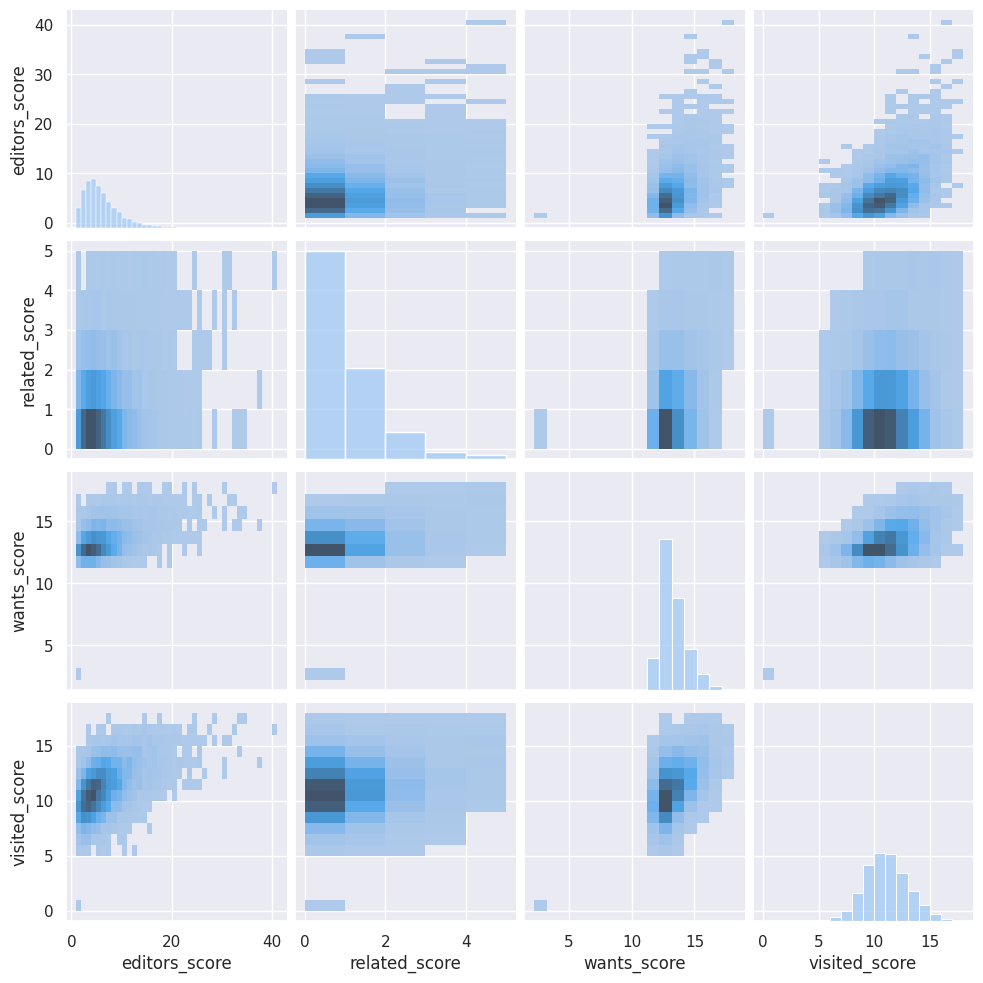

In [37]:
data['editors_score'] = data['placeEditors'].apply(lambda x: len(eval(x)))
data['related_score'] = data['placeRelatedLists'].apply(lambda x : len(eval(x)) if x is not np.nan else 0)
data['wants_score'] = np.log(data.numPeopleWant + 1)* 2
data['visited_score'] = np.log(data.numPeopleVisited + 1) * 2

sns.pairplot(
    data,
    vars = ['editors_score', 'related_score', 'wants_score', 'visited_score'],
    kind='hist',
    diag_kind='hist',
    plot_kws={'binwidth':1},
    diag_kws={'binwidth':1})
plt.show()

The variables looks correlated enough, except from `related_score`. We will combine the `importance` score with the similarity score, such as:
$$
    score_\rho(q,d) = \rho \cdot similarity(q,d) + (1 - \rho) \cdot  importance(d)
$$

In [38]:
from func.engines import RankEngine

rankEngine = RankEngine(data, ['placeName', 'placeDesc', 'placeUrl'])
rankEngine.fit(['placeDesc'])

We can now finally test our new ranking engine, you can search and rank by importance:

In [39]:
rankEngine.search('cemetery london highgate', k = 5)

,placeName,placeDesc,placeUrl,score
1,Highgate Cemetery,"Opened in 1839, Highgate is one of London’s mo...",https://www.atlasobscura.com/places/highgate-c...,0.875716
2964,World's Largest Potted Plant,At the heart of the west side of Highgate Ceme...,https://www.atlasobscura.com/places/worlds-lar...,0.682532
1108,Tower Hamlets Cemetery Park,Built as one of London’s “Magnificent Seven” V...,https://www.atlasobscura.com/places/tower-haml...,0.603744
2,Leadenhall Market,The ornate 19th-century painted roof and cobbl...,https://www.atlasobscura.com/places/leadenhall...,0.583531
170,Kensal Green Cemetery and Catacombs,Kensal Green is the one of the oldest public b...,https://www.atlasobscura.com/places/kensal-gre...,0.582557


You can search and rank by **location**:

In [40]:
rankEngine.location_search('cemetery', lat=44, lng=8, k=5)

,placeName,placeDesc,placeUrl,placeAlt,placeLng,score
6722,Cimitero Monumentale di Staglieno,The creation of the enormous sanctuary of stat...,https://www.atlasobscura.com/places/cimitero-m...,44.4302,8.9503,0.998128
3956,Ospedale Psichiatrico di Volterra,Looking like something straight out of a horro...,https://www.atlasobscura.com/places/ospedale-p...,43.4000,10.8756,0.994136
6521,Leuk Charnel House,Beneath an unmarked cellar door in a 15th cent...,https://www.atlasobscura.com/places/leuk-charn...,46.3175,7.6346,0.993642
5861,Cimitero delle Porte Sante (Sacred Doors Cemet...,"Tucked behind the 1,000-year-old church of San...",https://www.atlasobscura.com/places/cimitero-d...,43.7597,11.2642,0.993545
1053,Le Palais Idéal,From far away this palace looks like a cross b...,https://www.atlasobscura.com/places/le-palais-...,45.2563,5.0285,0.993267


You can search and rank by datetime (default will pick most recent):

In [41]:
rankEngine.time_search('London', date=datetime(year=2010, month=8, day=23), k=5)

,placeName,placeDesc,placeUrl,placePubDate,score
2291,The Monroe Moosnick Medical and Science Museum,Named after a late Transylvania University che...,https://www.atlasobscura.com/places/the-monroe...,2010-09-08,0.998118
643,Whispering Gallery at St Paul’s Cathedral,In the walkway that circles the inside of Chri...,https://www.atlasobscura.com/places/whispering...,2010-07-26,0.996707
5141,The Museum of Medieval Torture,Medieval torture devices and modern human righ...,https://www.atlasobscura.com/places/the-museum...,2010-07-02,0.993884
623,Long Now Orrery,Inside the offices of the Long Now Foundation ...,https://www.atlasobscura.com/places/long-now-o...,2010-07-01,0.993766
806,Carmo Convent Ruins,"“Come, ye philosophers, who cry, ‘All’s well,’...",https://www.atlasobscura.com/places/carmo-conv...,2010-06-25,0.993060


### Ranking Evaluation

We observe an improvement! We are confident that by tweaking a bit the values of $\rho$ and the weights of the `importance` score, we could obtain a much better result!

In [42]:
print("Ranking Engine evaluation:")
evaluate_engine(query_df.iloc[:N], rankEngine)

Ranking Engine evaluation:


KeyboardInterrupt: 

# 4. Visualizing the most relevant places

In [ ]:
import spacy
!python -m spacy download en_core_web_sm
spacy.load("en_core_web_sm") 
import nltk
# essential entity models downloads
nltk.downloader.download('maxent_ne_chunker')
nltk.downloader.download('words')
nltk.downloader.download('treebank')
nltk.downloader.download('maxent_treebank_pos_tagger')
nltk.downloader.download('punkt')
nltk.download('averaged_perceptron_tagger')

In [44]:
import locationtagger
QUERY = 'cemetery'
df = rankEngine.search(QUERY, columns = True, k = 30)
df['Country'] = df.placeAddress.apply(lambda ad: locationtagger.find_locations(text = ad).countries[0])
df['Address'] = df.placeAddress.apply(lambda ad: ad.split(';')[0])
df.head()

,placeName,placeTags,numPeopleVisited,numPeopleWant,placeDesc,placeShortDesc,placeNearby,placeAddress,placeAlt,placeLng,...,placeUrl,placeZone,editors_score,related_score,wants_score,visited_score,importance,score,Country,Address
4,Catacombes de Paris,"{'ossuaries', 'catacombs and crypts', 'memento...",4445,7045,"In 2004, Parisian police were assigned to do a...","The vast, legendary catacombs hold secrets muc...","['Sculptures de Décure', 'Arago Medallions', ""...","1 Place Denfert-Rochereau; Paris, 75014; France",48.8343,2.3322,...,https://www.atlasobscura.com/places/catacombes...,"Paris, France",1.000,1.0,0.975236,0.954637,0.982468,0.991234,France,1 Place Denfert-Rochereau
1,Highgate Cemetery,"{'catacombs and crypts', 'rivals week', 'vampi...",2617,8182,"Opened in 1839, Highgate is one of London’s mo...",London's creepiest cemetery was once the site ...,"[""World's Largest Potted Plant"", 'Dick Whittin...","Swain's Lane, Highgate; London, England, N6; U...",51.5675,-0.1483,...,https://www.atlasobscura.com/places/highgate-c...,"London, England",0.725,1.0,0.994033,0.894448,0.834620,0.917310,United Kingdom,"Swain's Lane, Highgate"
58,Père Lachaise Cemetery,"{'catacombs and crypts', 'cemeteries'}",4143,4000,"Originally established by Napoleon, the cemete...","France's most famous cemetery, with some of it...","['Grave of Antoine-Augustin Parmentier', 'The ...","16, rue du Repos; Paris, 75020; France",48.8594,2.3910,...,https://www.atlasobscura.com/places/pere-lacha...,"Paris, France",0.650,0.4,0.904129,0.946642,0.787693,0.893846,France,"16, rue du Repos"
131,Torre Argentina (Roman Cat Sanctuary),"{'roman', 'ruins', 'history', 'long now locati...",2495,3022,In Rome the cats have an ancient temple-comple...,Hundreds of lucky felines haunt the ruins wher...,"['Elephant and Obelisk', 'Santa Maria sopra Mi...","1-41 Via di Torre Argentina; Rome, 00186; Italy",41.8959,12.4765,...,https://www.atlasobscura.com/places/torre-arge...,"Rome, Italy",0.675,0.6,0.868911,0.889025,0.776984,0.888492,Italy,1-41 Via di Torre Argentina
182,Saint Louis Cemetery No. 1,"{'memento mori', 'catacombs and crypts', 'cata...",3584,2751,"Opened in 1789, the Saint Louis Cemetery #1 is...","The oldest cemetery in New Orleans, resting pe...","[""Marie Laveau's Tomb"", ""Nicolas Cage's Pyrami...",1255-1399 Conti St; 425 Basin St.; New Orleans...,29.9594,-90.0714,...,https://www.atlasobscura.com/places/saint-loui...,"New Orleans, Louisiana",0.575,0.4,0.857109,0.930174,0.734321,0.867160,United States,1255-1399 Conti St


In [50]:
import pandas as pd
import plotly.express as px

fig = px.scatter_mapbox(df, lat="placeAlt", lon="placeLng", hover_name="placeName", hover_data=["placeName", "Address","placeZone",'Country', "numPeopleVisited"],
                        color_discrete_sequence=["#4b7eb1"], zoom=3, height=300, size='score', size_max=15,
                        labels={'placeAlt':'Latitude','placeLng':'Longitude','placeName':'Name','numPeopleVisited':'Number of people who visited','placeZone':'City'})
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.update_traces(cluster={'enabled':True})
fig.show()

## 5. Filter Search Engine
We want to define a new Engine that searches across multiples corpora, instead of a single corpus, and combines their similarities. In order to do this we compute the similarities for each query on their respective corpus and we then combine it with the others through a **weighted sum**.
We could choose any weights for this purpose, but we want to represent the importance of a certain corpus versus the others. As such we choose that the weights for each corpus is inversely proportional to the number of terms in their corpus, as less terms means a smaller corpus, meaning that an eventual match there is probably more important than in the other corpora.
$$
Similarity_C(q,d) = \sum_{c \in C} \frac{similarity_c(q,d)}{\sqrt{|{terms \in c}|}}
$$

In [47]:
from func.engines import FilterEngine

filterEngine = FilterEngine(data)
filterEngine.fit(corpora=['placeName','placeAddress', 'placeDesc'])

In [48]:
filterEngine.corpora_weights

{'placeName': 0.45451647931745714,
 'placeAddress': 0.3510903540177221,
 'placeDesc': 0.19439316666482073}

Test it out!
The search function takes as input a dictionary where the key is the corpus to search in and the value is the query for such corpus. Then it takes parameters `tags, editors, lists` as lists of values and finally it takes `min_visited, max_visited` as integers. 
```python
filterEngine.search(
    queries     = dict<corpus_name, corpus_query>, 
    tags        = list<tags>,
    editors     = list<editors>,
    lists       = list<lists>,
    min_visited = int,
    max_visited = int)
```

In [49]:
filterEngine.search(
    queries = {
        'placeDesc': 'chicken mascot', 
        'placeName': 'grave',
        'placeAddress' : 'United States'
    }, 
    tags=['gravestones'],
    # editors=['SEANETTA'],
    # lists=['Historic Cemeteries in London'],
    # min_visited=200,
    # max_visited=500,
    # columns=True,
    k=10
)

,placeUrl,placeAddress,placeDesc,similarity,placeName
1992,https://www.atlasobscura.com/places/colonel-sa...,"701 Baxter Ave; Louisville, Kentucky, 40204; U...","Located in Kentucky’s Cave Hill Cemetery, the ...",0.976680,Colonel Sanders' Grave
5401,https://www.atlasobscura.com/places/smokey-bea...,"102 Smokey Bear Blvd; Capitan, New Mexico; Uni...","In 1950, a wildfire raged in the Lincoln Natio...",0.954654,Smokey Bear's Grave
2128,https://www.atlasobscura.com/places/grave-of-j...,"1501 Greenmount Ave; Baltimore, Maryland; Unit...","One of the top actors of his day, Booth assass...",0.805607,Grave of John Wilkes Booth
2382,https://www.atlasobscura.com/places/the-unmark...,"626 Baily Road; Yeadon, Pennsylvania; United S...",Section 15 of the Holy Cross Cemetery in Yeado...,0.805607,Unmarked Grave of H.H. Holmes
2422,https://www.atlasobscura.com/places/paste-eate...,"Goldfield Pioneer Cemetery; Goldfield, Nevada;...","As the story goes, a vagrant wandering the str...",0.805607,Paste Eater's Grave
2665,https://www.atlasobscura.com/places/grave-of-c...,"330 Bonaventure Rd; Savannah, Georgia, 31404; ...","Born: September 21, 1846 Died: January 24, 187...",0.805607,Grave of Corinne Elliot Lawton
2911,https://www.atlasobscura.com/places/st-omer-ce...,"St Omer Rd; Ashmore, Illinois; United States",Driving along one of many county roads in the ...,0.805607,St. Omer Cemetery Witch Grave
3486,https://www.atlasobscura.com/places/tent-grave...,"Mt. Gilead Church Rd; Sparta, Tennessee; Unite...",A fascinating group of tent-shaped stone grave...,0.805607,Tent Graves of Mt. Gilead Cemetery
3532,https://www.atlasobscura.com/places/grave-of-a...,"1066 Connor Road; Castle Shannon, Pennsylvania...","A site of pilgrimage for many art fans, Andy W...",0.805607,Grave of Andy Warhol
4062,https://www.atlasobscura.com/places/the-grave-...,"2 Cemetery Rd; Natchez, Mississippi, 39120; Un...",When Florence Irene Ford died at the age of 10...,0.805607,Grave of Florence Irene Ford
